# Session assignments
Interactively determines the assignments of presentations to sessions.

## Paths, packages, and parameters

You will need to adjust the paths (data_root and code_root) to specify where on Google Drive (or your local machine) the data and code files may be found.

In [37]:
# Division to analyze 
division = 'dcb_dvm'

# Presentations ('talks' or 'posters')
presentation_type = 'talks'

# Data type ('keywords' or 'similarity') used in hierarchical clustering
# data_type = 'keywords'
data_type = 'similarity'

# Minimum and maximum number of presentations per session
min_size = 6
max_size = 8

# Import outside packages
import os, sys
import pandas as pd

# Mount Google Drive, if running on Google Colab
if 'COLAB_GPU' in os.environ:
    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Set the data root to a Google Drive folder
    data_root = '/content/drive/MyDrive/meeting_planning_2024/' + division 
    code_root = '/content/drive/MyDrive/Colab Notebooks/conference_planner'

    # Add code to path
    sys.path.append(code_root)

# If running locally, set the data root
else:
    # Set paths
    code_root = '/Users/mmchenry/Documents/code/conference_planner'
    data_root = '/Users/mmchenry/Documents/Projects/meeting_planner_test/division_files/' + division

# Custom packages
import make_sessions as ms
import compile_program as cp
import network_analysis as na

# Adjust table display setting 
pd.set_option('display.max_colwidth', None)


# Create groups by hierarchical clustering
Creates a phylogeny (i.e., dendrogram) of relationships between talks and defines the major groups, using a distance threshold. By specifying the data_type variable, this step can either depend on the keyword ratings or the similarity values values between talks.

**'keyword' data type**: Note that the weightings of each keyword, defined in keyword_weights.xlsx, is critical in defining which keywords will be used for the major branches. 
In particular, the 'weight_clustering' column values are multiplied by the keyword ratings from GPT. 

Any zero weighting values are excluded from consideration in determining the major branches.
It is a good idea at this stage to zero out any keywords that are non-essential in differentiating major categories of talks.

**'similarity' data type**: This uses the cosine similarity values as the basis for the dendrogram.


In [46]:
# Find the cosine similarity between abstracts, save to _similarity.csv file 
na.calc_similarity(data_root, presentation_type=presentation_type, organization_level='group')

# Run initial clustering
Z, distance_threshold = ms.run_hierarchical(data_root,  presentation_type=presentation_type, 
                                            data_type=data_type,min_size=12)

# Summarize the major keywords for each branch
ms.summarize_group_keywords(data_root, presentation_type=presentation_type, grouping_level='groups', 
                            num_keywords=9)

# Plot dendrogram
ms.plot_dendrogram(Z, distance_threshold)

# Output divisional schedule to html
cp.render_schedule_html(data_root, presentation_type, grouping_level='groups', include_summary=True)

Saved talks similarity data to /Users/mmchenry/Documents/Projects/meeting_planner_test/division_files/dcb_dvm/talks_similarity_group.csv
Saved talks data with major_group assignments to /Users/mmchenry/Documents/Projects/meeting_planner_test/division_files/dcb_dvm/talks_grouping.csv


KeyError: 'weight_clustering'

## Word clouds of groups

This visual offers some sense of the topics covered by each group. Each cloud is based on the words in the abstracts and does not consider the keyword ratings.

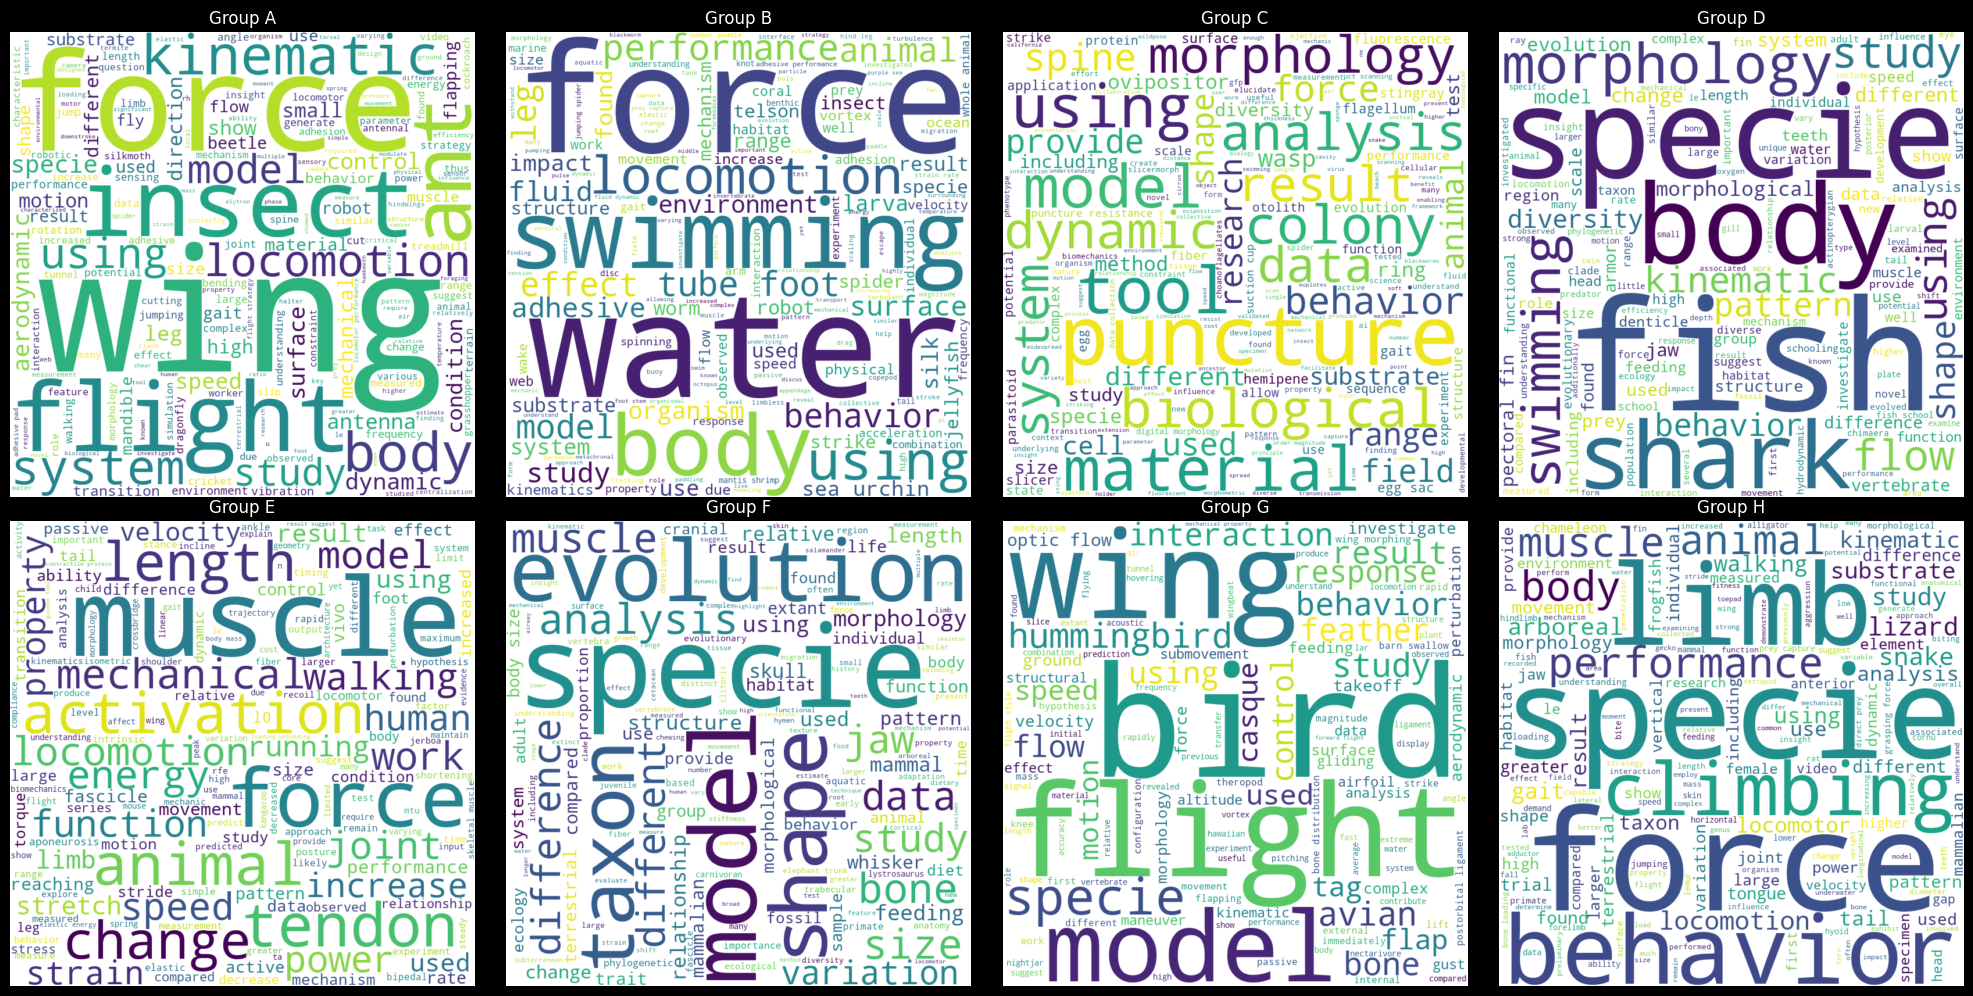

In [33]:
cp.word_cloud(data_root, presentation_type, num_columns=4)

## Session making within each group
Finally, each group is divided into sessions of 6-8 talks that are in an optimal order by their keyword ratings.

This stage, called sequencing, ignores all keywords that were used for hierarchical clustering (i.e., where weight_clustering are non-zero).
The weightings of the remaining keywords are specified in the 'weight_sequencing' column in keyword_weights.xlsx.

In [34]:
# Create sessions of talks that are similar to each other
ms.make_sessions(data_root, presentation_type=presentation_type, min_size=min_size, max_size=max_size, echo=True)

Processing group A . . .
Processing group B . . .
Processing group C . . .
Processing group D . . .
Processing group E . . .
Processing group F . . .
Processing group G . . .
Processing group H . . .
Saved talks with session numbers to /Users/mmchenry/Documents/Projects/meeting_planner_test/division_files/dcb_dvm/talks_grouping.csv


## Display the sessions

In [35]:
# Summarize the major keywords for each session
ms.summarize_group_keywords(data_root, presentation_type=presentation_type, grouping_level='session', num_keywords=9)

# Output divisional schedule to html
cp.render_schedule_html(data_root, presentation_type=presentation_type, grouping_level='sessions', include_summary=True)

,Session,Number of Talks,Top Keywords
0,1,6,"['flying (0.42)', 'robots (0.30)', 'running (0.17)', 'swimming (0.00)', 'feeding (0.00)']"
1,2,6,"['feeding (0.50)', 'running (0.00)', 'swimming (0.00)', 'flying (0.00)', 'robots (0.00)']"
2,3,6,"['robots (0.55)', 'flying (0.33)', 'swimming (0.08)', 'running (0.04)', 'feeding (0.00)']"
3,4,6,"['flying (0.67)', 'robots (0.17)', 'running (0.12)', 'swimming (0.00)', 'feeding (0.00)']"
4,5,7,"['running (0.53)', 'robots (0.29)', 'swimming (0.00)', 'flying (0.00)', 'feeding (0.00)']"
5,6,8,"['flying (0.75)', 'robots (0.12)', 'feeding (0.03)', 'running (0.00)', 'swimming (0.00)']"
6,7,6,"['swimming (0.33)', 'robots (0.28)', 'feeding (0.25)', 'running (0.00)', 'flying (0.00)']"
7,8,6,"['swimming (0.68)', 'robots (0.17)', 'running (0.00)', 'flying (0.00)', 'feeding (0.00)']"
8,9,6,"['swimming (0.90)', 'robots (0.58)', 'feeding (0.08)', 'running (0.00)', 'flying (0.00)']"
9,10,7,"['swimming (0.36)', 'feeding (0.07)', 'running (0.00)', 'flying (0.00)', 'robots (0.00)']"


Saved branch summary to /Users/mmchenry/Documents/Projects/meeting_planner_test/division_files/dcb_dvm/talks_group_summary.csv
Sessions written to /Users/mmchenry/Documents/Projects/meeting_planner_test/division_files/dcb_dvm/sessions_talks.html
Copy and paste path into a web browser
